In [166]:
import pandas as pd
import json
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
# set maximum number of rows to show
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split

In [3]:
ds =pd.read_excel(open('Ponkoj Chandra Shill.xlsx','rb'), sheet_name='Dataset-student')
ds

,Student Id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,1,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6
1,2,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,NaN,no,no,no,yes,yes,no,5,3,3,1,1,3,4
2,3,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10
3,4,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2
4,5,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11
391,392,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3
392,393,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3
393,394,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0


In [4]:
dm = pd.read_excel(open('Ponkoj Chandra Shill.xlsx','rb'), sheet_name='Dataset-student-math')
dm.columns = ['Student Id','G1-M','G2-M','G3-M']
dm

,Student Id,G1,G2,G3
0,1,5,6,6
1,2,5,5,6
2,3,7,8,10
3,4,15,14,15
4,5,6,10,10
...,...,...,...,...
390,391,9,9,9
391,392,14,16,16
392,393,10,8,7
393,394,11,12,10


In [7]:
de = pd.read_excel(open('Ponkoj Chandra Shill.xlsx','rb'), sheet_name='Dataset-student-english')
de.columns = ['Student Id','G1-E','G2-E','G3-E']
de

,Student Id,G1-E,G2-E,G3-E
0,1,0,11,11
1,2,9,11,11
2,3,12,13,12
3,4,14,14,14
4,5,11,13,13
...,...,...,...,...
390,391,14,13,14
391,392,11,13,14
392,393,12,13,15
393,394,14,14,15


In [8]:
scores = dm.merge(de, on='Student Id',validate = 'one_to_one')
scores

,Student Id,G1-M,G2-M,G3-M,G1-E,G2-E,G3-E
0,1,5,6,6,0,11,11
1,2,5,5,6,9,11,11
2,3,7,8,10,12,13,12
3,4,15,14,15,14,14,14
4,5,6,10,10,11,13,13
...,...,...,...,...,...,...,...
390,391,9,9,9,14,13,14
391,392,14,16,16,11,13,14
392,393,10,8,7,12,13,15
393,394,11,12,10,14,14,15


In [9]:
df = ds.merge(scores, on='Student Id',validate = 'one_to_one')
df

,Student Id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1-M,G2-M,G3-M,G1-E,G2-E,G3-E
0,1,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,11,11
1,2,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,NaN,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,9,11,11
2,3,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,12,13,12
3,4,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,14,14,14
4,5,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,14,13,14
391,392,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,11,13,14
392,393,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,12,13,15
393,394,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,14,14,15


# 1. What is the difference in final grade in Math for male vs female students?


In [18]:
df.groupby(by='sex')['G3-M'].agg('sum').diff()

sex
F     NaN
M   -32.0
Name: G3-M, dtype: float64

# 2.How many students have higher score in Math in G2, than in G3?

In [24]:
df[(df['G2-M'] > df['G3-M'])][['G2-M','G3-M']].shape[0]

90

# 3.What is the correlation between absence and Math final grade?

In [29]:
df['absences'].corr(df['G3-M'])

0.03424731615006934

# 4.If a student scores 16 in Math final grade, what is his probable final grade in English?

In [30]:
a = df[['G3-M','G3-E']]
a.describe().T

,count,mean,std,min,25%,50%,75%,max
G3-M,395.0,10.415190,4.581443,0.0,8.0,11.0,14.0,20.0
G3-E,395.0,12.460759,2.604244,0.0,11.0,12.0,14.0,19.0


In [34]:
df[df['G3-M'] == 16][['G3-E']].mean()

G3-E    14.0
dtype: float64

# 5. What is the student id of third top scorer in Math final grade?

In [317]:
df[['Student Id','G3-M']].sort_values(by = ['G3-M'],ascending = False).iloc[2:3,0]

110    111
Name: Student Id, dtype: int64

# 6. What is the student id of fifth top scorer combining both Math and English final grade?

In [320]:
df['Total_Final']= df[['G3-M','G3-E']].sum(axis=1)
df[['Student Id','Total_Final']].sort_values(by = ['Total_Final'],ascending = False).iloc[4:5,0]

374    375
Name: Student Id, dtype: int64

# 7. What is the minimum final grade in Math for students in 3rd quartile?

In [314]:
df['q_G3-M'] = pd.qcut(df['G3-M'], 4, labels=False)
df[df['q_G3-M'] ==2]['G3-M'].min()

12

# 8. Student of which age has better final grade in English?

In [121]:
df[['age','G3-E']].groupby(by='age')['G3-E'].mean().sort_values(ascending= False).iloc[0:1]

age
21    15.0
Name: G3-E, dtype: float64

# 9. Show age distribution of students in bar chart

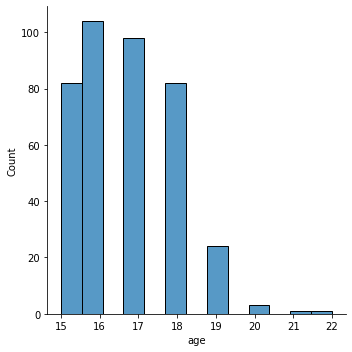

In [122]:
sns.displot(df, x="age")

# 10. What is the standard deviation in English final grade?

In [124]:
df['G3-E'].describe().T

count    395.000000
mean      12.460759
std        2.604244
min        0.000000
25%       11.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3-E, dtype: float64

# 11. Above which score, we should consider Math final grade as outliers?

<AxesSubplot:xlabel='G3-M'>

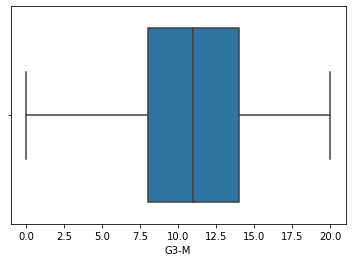

In [125]:
sns.boxplot(df['G3-M'])

In [137]:
df[df['G3-M']>15].shape[0]/len(df)*100

10.126582278481013

In [135]:
df[df['G3-M']<5].shape[0]/len(df)*100

9.873417721518987

<AxesSubplot:xlabel='G3-M', ylabel='Density'>

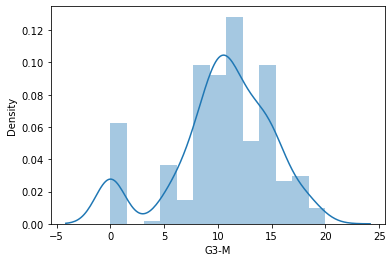

In [129]:
sns.distplot(df['G3-M'])

 # 12. If G2 value was missing for Student Id 10, what value would you put there?

In [144]:
int(df[['G2-E']].mean())

12

In [143]:
int(df[['G2-M']].mean())

10

# 13. How many records have missing values?

In [148]:
df.isnull().sum().sum()

5

# 14. Show box-plot of Math final grade distribution based on school and address

<AxesSubplot:xlabel='school', ylabel='G3-M'>

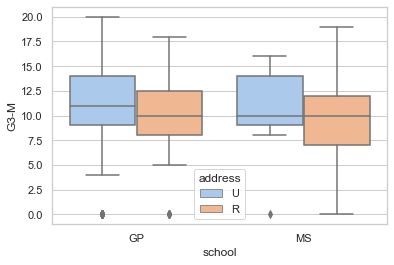

In [162]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="school", y="G3-M", hue= 'address',palette="pastel",data=df)

# 15. Predict Math final grade of a student with:
School: GP, sex: F, age: 15, address: U, Psatus: A, Medu: 4, Fedu: 3

In [226]:
df[(df['school'] == 'GP') & (df['sex']== 'F')& (df['address']=='U')& (df['age']==15)&(df['Pstatus']=='A')&(df['Medu']==4)&(df['Fedu']==3)]

,Student Id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1-M,G2-M,G3-M,G1-E,G2-E,G3-E,Total_Final
45,46,GP,F,15,U,LE3,A,4,3,other,other,course,mother,1,2,0,yes,yes,yes,yes,yes,yes,yes,yes,5,2,2,1,1,5,8,8,8,6,10,11,11,17
56,57,GP,F,15,U,GT3,A,4,3,services,services,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,4,3,2,1,1,1,0,14,15,15,15,14,15,30


In [228]:
import catboost
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_percentage_error

In [229]:
dataset = df[['school', 'sex', 'age', 'address', 'Pstatus', 'Medu', 'Fedu', 'G3-M']]
dataset

,school,sex,age,address,Pstatus,Medu,Fedu,G3-M
0,GP,F,18,U,A,4,4,6
1,GP,F,17,U,T,1,1,6
2,GP,F,15,U,T,1,1,10
3,GP,F,15,U,T,4,2,15
4,GP,F,16,U,T,3,3,10
...,...,...,...,...,...,...,...,...
390,MS,M,20,U,A,2,2,9
391,MS,M,17,U,T,3,1,16
392,MS,M,21,R,T,1,1,7
393,MS,M,18,R,T,3,2,10


In [184]:
# type convert
# dataset.Medu = dataset.Medu.astype('str')
# dataset.Fedu = dataset.Fedu.astype('str')

In [230]:
dataset.dtypes

school     object
sex        object
age         int64
address    object
Pstatus    object
Medu        int64
Fedu        int64
G3-M        int64
dtype: object

In [231]:
train,test = train_test_split(dataset, test_size=0.15, random_state=12)

In [232]:
train_label = train['G3-M']
train_data = train.drop(['G3-M'], axis=1)

test_label = test['G3-M']
test_data  = test.drop(['G3-M'],axis = 1)

# initialize train and test Pool
train_pool = Pool(train_data, 
                  train_label, 
                  cat_features=[0,1,3,4])
test_pool = Pool(test_data,
                 test_label,
                 cat_features=[0,1,3,4])

In [ ]:

model = CatBoostRegressor(iterations=10000, depth=8, learning_rate=0.1,bagging_temperature= 1,
                          loss_function='RMSE',eval_metric='R2')
model.fit(train_pool,eval_set=test_pool,use_best_model=True)
model.predict(['GP', 'F', 15,'U','A',4,3])


In [233]:
# specify the training parameters 
model = CatBoostRegressor(iterations=10000, 
                          depth=8, 
                          learning_rate=0.1, 
                          bagging_temperature= 1,
                          loss_function='RMSE',
                          eval_metric='R2',
                          random_seed = 12,
                          task_type="CPU",
                          od_wait = 20)

#train the model
model.fit(train_pool,eval_set=test_pool,
             use_best_model=True, early_stopping_rounds=None,
          verbose=False, plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

RMSE:  16.965777795329583
MAE:  3.046995633421925
R2:  -0.0071367334474392585
Explained Variance:  0.007714849374556243
MAPE:  3048183207380693.5


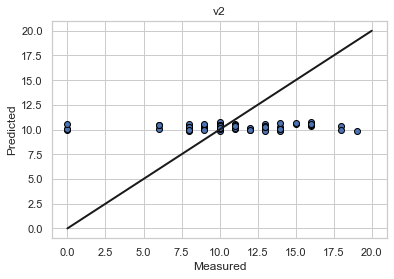

In [234]:
# make predictions
test_pred = model.predict(test_data)

# evaluate the model
print('RMSE: ', mean_squared_error(test_label, test_pred))
print('MAE: ', mean_absolute_error(test_label, test_pred))
print('R2: ', r2_score(test_label, test_pred))
print('Explained Variance: ', explained_variance_score(test_label, test_pred))
print('MAPE: ', mean_absolute_percentage_error(test_label, test_pred))

# plot the results
fig, ax = plt.subplots()
ax.scatter(test_label, test_pred, edgecolors=(0, 0, 0))
ax.plot([train_label.min(), train_label.max()], [train_label.min(), train_label.max()], 'k-', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('v2')
plt.show()

In [235]:
test_pred = model.predict(['GP', 'F', 15,'U','A',4,3])
test_pred

10.590524910871645

# 16. Students good at Math are also good at English - True or False or Depends?

In [236]:
df.columns

Index(['Student Id', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1-M', 'G2-M', 'G3-M',
       'G1-E', 'G2-E', 'G3-E', 'Total_Final'],
      dtype='object')

In [238]:
df['M'] = df[['G1-M', 'G2-M', 'G3-M']].sum(axis = 1)
df['E'] = df[['G1-E', 'G2-E', 'G3-E']].sum(axis = 1)
df

,Student Id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1-M,G2-M,G3-M,G1-E,G2-E,G3-E,Total_Final,M,E
0,1,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,0,11,11,17,17,22
1,2,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,NaN,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,9,11,11,17,16,31
2,3,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,12,13,12,22,25,37
3,4,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,14,14,14,29,44,42
4,5,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,11,13,13,23,26,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,14,13,14,23,27,41
391,392,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,11,13,14,30,46,38
392,393,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,12,13,15,22,25,40
393,394,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,14,14,15,25,33,43


<AxesSubplot:xlabel='M', ylabel='Density'>

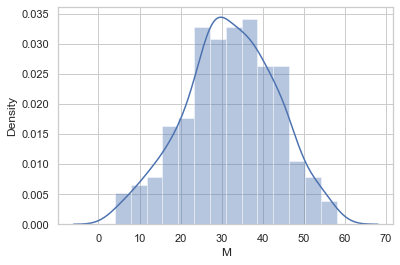

In [239]:
sns.distplot(df['M'])

<AxesSubplot:xlabel='E', ylabel='Density'>

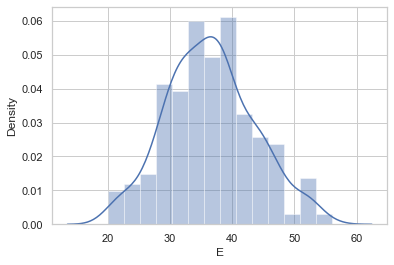

In [240]:
sns.distplot(df['E'])

In [244]:
df_ = df[(df['M'] >= 40) | (df['E']>=40)]
df_['diff'] = abs(df['M'] -df['E'])
df_

,Student Id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1-M,G2-M,G3-M,G1-E,G2-E,G3-E,Total_Final,M,E,diff
3,4,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,14,14,14,29,44,42,2
5,6,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15,12,12,13,28,45,37,8
8,9,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19,15,16,17,36,53,48,5
9,10,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15,12,12,13,28,44,37,7
10,11,GP,F,15,U,GT3,T,4,4,teacher,health,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,3,3,3,1,2,2,0,10,8,9,14,14,14,23,27,42,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,391,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,14,13,14,23,27,41,14
391,392,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,11,13,14,30,46,38,8
392,393,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,12,13,15,22,25,40,15
393,394,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,14,14,15,25,33,43,10


In [249]:
df_['diff'].describe()

count    175.000000
mean      11.240000
std        8.383043
min        0.000000
25%        5.000000
50%        9.000000
75%       15.000000
max       47.000000
Name: diff, dtype: float64

# 17. Male students are good at Math compared to Female - True or False or Depends?

In [258]:
df.groupby(by='sex')['M'].mean()

sex
F    30.975962
M    33.219251
Name: M, dtype: float64

In [260]:
m = df[df.sex == 'M']['M'].mean()
f = df[df.sex == 'F']['M'].mean()

33.219251336898395

In [268]:
data = {'Male': df[df.sex == 'M']['M'].mean(),
       'Female':df[df.sex == 'F']['M'].mean()}
data = pd.DataFrame.from_dict(data, orient='index').reset_index()
data

,index,0
0,Male,33.219251
1,Female,30.975962


<AxesSubplot:xlabel='index', ylabel='0'>

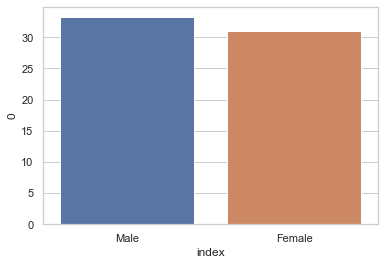

In [275]:
sns.barplot(x = 'index',y = 0, data= data)

# 18. Students need to attend classes to score high in Math - True or False or Depends?

In [284]:
df[['absences','M']]

,absences,M
0,6,17
1,4,16
2,10,25
3,2,44
4,4,26
...,...,...
390,11,27
391,3,46
392,3,25
393,0,33


In [281]:
df['absences'].corr(df['M'])

-0.005908806132303028

<AxesSubplot:xlabel='M', ylabel='absences'>

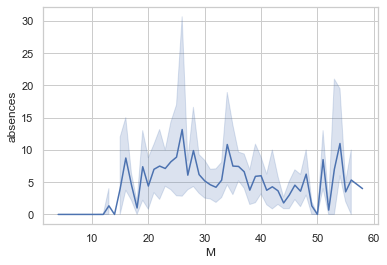

In [293]:
sns.lineplot(y = df['absences'], x = df['M'])

# 19. Which attribute contributes most in predicting score of a student in Math?

<AxesSubplot:>

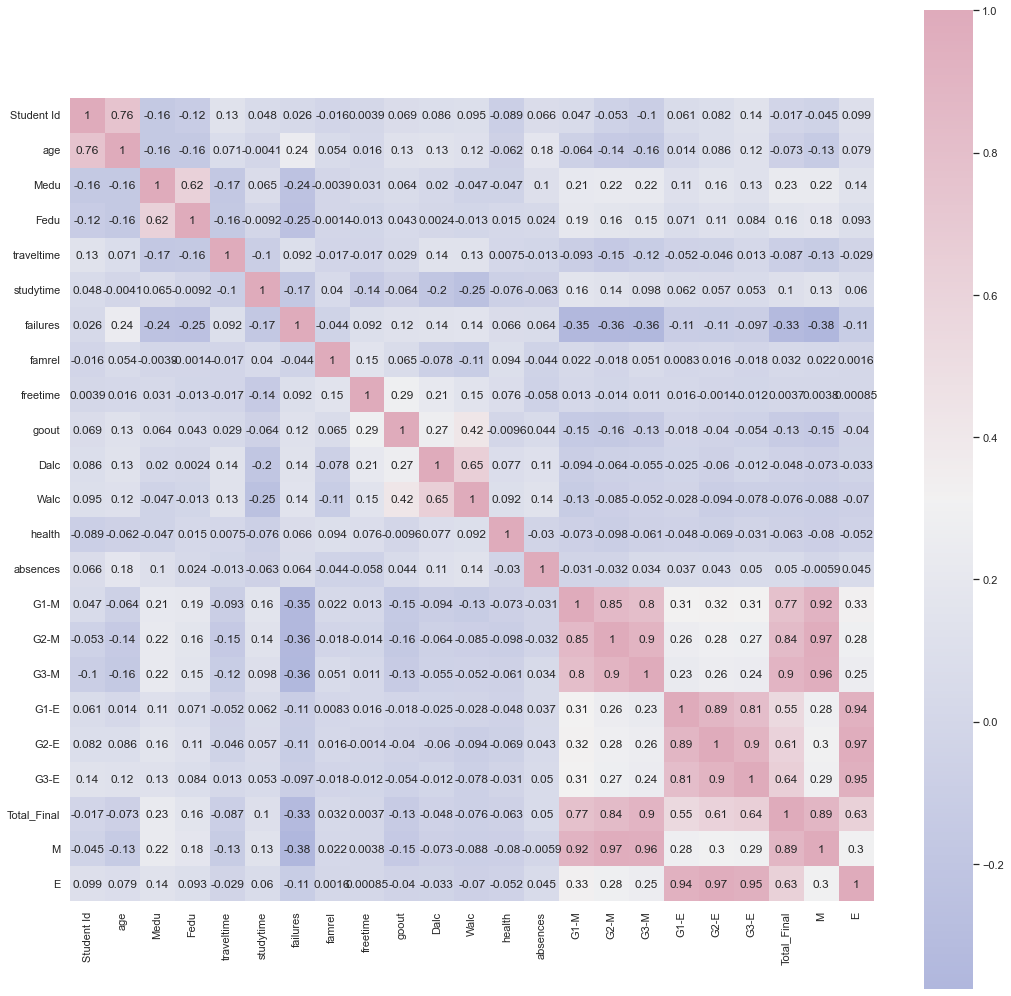

In [294]:
corrmat = df.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [297]:
abs(df.corrwith(df["Total_Math"])).sort_values(ascending=False)

M              1.000000
G2-M           0.967999
G3-M           0.959873
G1-M           0.919386
Total_Final    0.887345
failures       0.375759
E              0.299519
G2-E           0.296009
G3-E           0.285873
G1-E           0.276191
Medu           0.224260
Fedu           0.175852
goout          0.154511
age            0.134589
studytime      0.134565
traveltime     0.128197
Walc           0.088025
health         0.080380
Dalc           0.072508
Student Id     0.045343
famrel         0.021653
absences       0.005909
freetime       0.003773
dtype: float64

# 20. How many students are in top decile in Math score but in bottom decile in English score?

In [306]:
df['decile_Math'] = pd.qcut(df['M'], 10, labels=False)
df['decile_English'] = pd.qcut(df['E'], 10, labels=False)
df[(df['decile_Math'] == 0)& (df['decile_English'] == 9)].shape[0]

4